<img src="img/CSK_banner.PNG" alt="banner">
# A (Brief) Introduction to Data Science
**CSK 2020**

Welcome to the wild world of data science! This is a notebook designed for UC Berkeley's CS Kickstart program, specifically . Feel free to read through this lab and interact with the content.

## Table of Contents
- The Jupyter Notebook
- "The Data Science Life Cycle"
- Data Analysis 
- Hypothesis and Predictions
- Next Steps


# 0: The Jupyter Notebook
[Jupyter Notebook](https://jupyter.org/) is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text. The file that we are on now is a jupyter notebook, and it's used fairly extensively in the data science industry. It consists of a series of cells that you can run in real time.

Here's a quick rundown on how to use this notebook.

## 0.1 Cells
This notebook is made out of a series of cells. A cell is a multiline text input field, and its contents can be executed by using Shift-Enter, or by clicking either the “Play” button (▶|) in the toolbar, or Cell, Run in the menu bar. 

There are three types of cells:
- code cells
- markdown cells
- raw cells

You don't need to worry about the last type of cell; we'll be dealing with the first two today.
### 0.1.1 Code Cells
Code cells are cells where we can write and run code in python. Here's an example of a code cell, see if you can run it by pressing Shift-Enter (or Cell->Run in the menu)


In [1]:
print('hello world')


hello world


If you ran the cell correctly, the notebook should output the words "hello world". Pretty neat huh?

### 0.1.1 Markdown Cells
Markdown cells are cells like this one where we can write text and have it display in the notebook. In this notebook the only time you'll have to edit these types of cells will be in some free response answers like the one below. Edit the following cell and run it to see the text!

**Question 0.1** What's your name and favorite food?

*YOUR ANSWER HERE*

# 1."The Data Science Life Cycle"

The first thing we can ask ourselves about this question is "what exactly *is* data science in the first place?"

The [data8 textbook](https://www.inferentialthinking.com/chapters/01/1/intro.html) says the following about data science.
> Data Science is about drawing useful conclusions from large and diverse data sets through exploration, prediction, and inference. Exploration involves identifying patterns in information. Prediction involves using information we know to make informed guesses about values we wish we knew. Inference involves quantifying our degree of certainty: will the patterns that we found in our data also appear in new observations?

Hopefully we can continue to develop this definition during today's lab, starting off with a concept called the "data science life cycle."

## 1.1 The Life Cycle, deconstructed
The steps to the cycle are as follows: 
1. Formulating a question or problem
2. Acquiring and cleaning data
3. Conducting exploratory data analysis
4. Using prediction and inference to draw conclusions


In [52]:
## cleaning data real quick 
from datascience import *
import pandas as pd
import matplotlib as plt
import numpy as np

%matplotlib inline

by_maj = Table.read_table('data/by_major.csv')
#bm = pd.read_csv('data/by_major.csv')
by_min = Table.read_table('data/by_minors.csv')
gender_ethnicity = Table.read_table('data/level_gender_ethnicity.csv')
STEM_all = Table.read_table('data/STEM_collegewide.csv')
STEM_major = Table.read_table('data/STEM_majors.csv')
STEM_pipeline = Table.read_table('data/STEM_pipeline.csv')
student_maj = Table.read_table('data/student_majors.csv')

In [7]:
by_maj.show(5)

Unnamed: 0,Academic Yr,Degree Level Desc,Degree Desc,College/School,Division,Department,Major,MajorShort,STEM Flag,Entry Status Desc,Residency Status Desc,Gender,Ethnicity,Headcount
0,2011-12,Bachelor,Bachelor of Arts,Clg of Environmental Design,Clg of Environmental Design,Architecture,Architecture,Architecture,0,Freshman,CA Resident,Female,Asian/Pacific Islander,26
1,2011-12,Bachelor,Bachelor of Arts,Clg of Environmental Design,Clg of Environmental Design,Architecture,Architecture,Architecture,0,Freshman,CA Resident,Female,Underrepresented Minority,10
2,2011-12,Bachelor,Bachelor of Arts,Clg of Environmental Design,Clg of Environmental Design,Architecture,Architecture,Architecture,0,Freshman,CA Resident,Female,White/Other,11
3,2011-12,Bachelor,Bachelor of Arts,Clg of Environmental Design,Clg of Environmental Design,Architecture,Architecture,Architecture,0,Freshman,CA Resident,Male,Asian/Pacific Islander,12
4,2011-12,Bachelor,Bachelor of Arts,Clg of Environmental Design,Clg of Environmental Design,Architecture,Architecture,Architecture,0,Freshman,CA Resident,Male,Underrepresented Minority,9


In [51]:
print('This is how many rows are in our table: ', by_maj.num_rows)
print('This is how many columns are in our table: ', by_maj.num_columns)

This is how many rows are in our table:  18025
This is how many columns are in our table:  15


In [8]:
stem_gender = by_maj.select(['STEM Flag', 'Gender'])
stem_gender.group('STEM Flag')
#shows the distribution of stem vs non stem students

STEM Flag,count
0,8826
1,9199


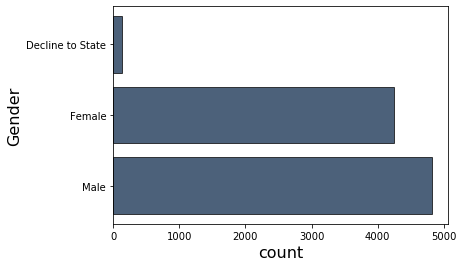

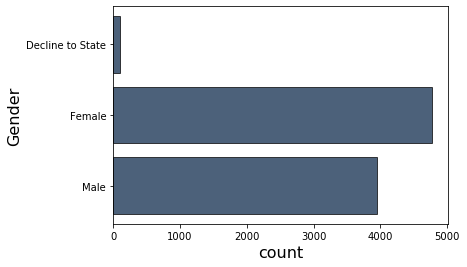

In [27]:
#separate into stem and non-stem majors by gender
stem_majors = stem_gender.group(['STEM Flag', 'Gender']).where('STEM Flag', 1)
non_stem_majors = stem_gender.group(['STEM Flag', 'Gender']).where('STEM Flag', 0)

#graph gender distribution between stem vs. non-stem majors
stem_majors.select(['Gender', 'count']).barh('Gender')
non_stem_majors.select(['Gender', 'count']).barh('Gender')

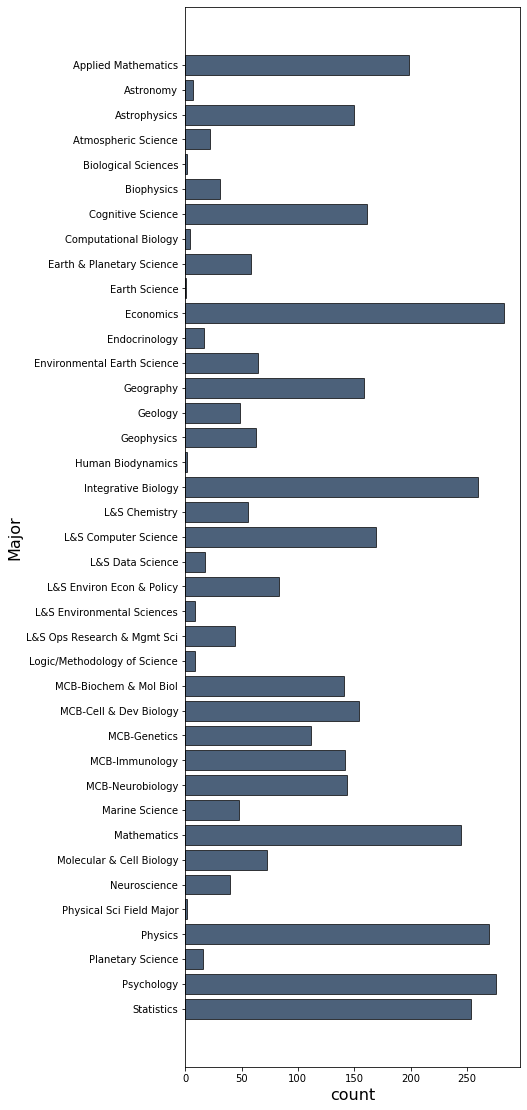

In [44]:
stem = by_maj.where('STEM Flag', 1).where('College/School', are.equal_to('Clg of Letters & Science')).group('Major')
stem.barh('Major')

# Hypothesis Testing for Proportion of CS Majors across schools


In [61]:
by_maj.where('Major', 'Computer Science').group('Degree Desc')

Degree Desc,count
Doctor of Philosophy,53
Master of Science,51


In [64]:
berkeley_cs = by_maj.where('Major', 'L&S Computer Science')
berkeley_cs.show(5)

Unnamed: 0,Academic Yr,Degree Level Desc,Degree Desc,College/School,Division,Department,Major,MajorShort,STEM Flag,Entry Status Desc,Residency Status Desc,Gender,Ethnicity,Headcount
51,2011-12,Bachelor,Bachelor of Arts,Clg of Letters & Science,L&S Administered Programs,L&S Computer Science,L&S Computer Science,Comp Sci,1,Freshman,CA Resident,Female,Asian/Pacific Islander,9
52,2011-12,Bachelor,Bachelor of Arts,Clg of Letters & Science,L&S Administered Programs,L&S Computer Science,L&S Computer Science,Comp Sci,1,Freshman,CA Resident,Female,Underrepresented Minority,1
53,2011-12,Bachelor,Bachelor of Arts,Clg of Letters & Science,L&S Administered Programs,L&S Computer Science,L&S Computer Science,Comp Sci,1,Freshman,CA Resident,Female,White/Other,6
54,2011-12,Bachelor,Bachelor of Arts,Clg of Letters & Science,L&S Administered Programs,L&S Computer Science,L&S Computer Science,Comp Sci,1,Freshman,CA Resident,Male,Asian/Pacific Islander,33
55,2011-12,Bachelor,Bachelor of Arts,Clg of Letters & Science,L&S Administered Programs,L&S Computer Science,L&S Computer Science,Comp Sci,1,Freshman,CA Resident,Male,Underrepresented Minority,3


In [65]:
berkeley_cs_proportion = berkeley_cs.num_rows / sum(stem_majors.column('count'))
print('The proportion of CS Majors amoung all stem majors at berkeley is: ', berkeley_cs_proportion)

The proportion of CS Majors amoung all stem majors at berkeley is:  0.01837156212631808


In [67]:
STEM_all.show(5)

Year,Institution,Type,Gender,CIP Fld,Degree Count
2016-17,Harvard,Private,Female,Archeology,5
2016-17,Harvard,Private,Female,Behavioral Sciences,11
2016-17,Harvard,Private,Female,Biological and Biomedical Sciences,164
2016-17,Harvard,Private,Female,Cognitive Psychology and Psycholinguistics,0
2016-17,Harvard,Private,Female,Computer Science,65


In [84]:
def get_cs_proportion(school):
    school_pop = STEM_all.where('Institution', school).column('Degree Count')
    school_pop = sum([int(i.replace(',', '')) for i in school_pop])
    cs_count = STEM_all.where('Institution', school).where('CIP Fld', 'Computer Science').column('Degree Count')
    cs_count = sum([int(i.replace(',', '')) for i in cs_count])
    
    return cs_count / school_pop


print(get_cs_proportion('Harvard'))

0.20140105078809106


In [90]:
all_school_names = STEM_all.group('Institution').column('Institution')
cs_proportions = []


for i in all_school_names:
    cs_proportions = np.append(cs_proportions, get_cs_proportion(i))
    

# ADD Values for berkeley
all_school_names = np.append(all_school_names, 'Berkeley')
cs_proportions = np.append(cs_proportions, berkeley_cs_proportion)

In [91]:
cs_proportion_by_school = Table().with_columns('Institution', all_school_names, "CS Proportions", cs_proportions)
cs_proportion_by_school.show(5)

Institution,CS Proportions
Harvard,0.201401
Illinois,0.0608883
MIT,0.309582
Michigan,0
Princeton,0


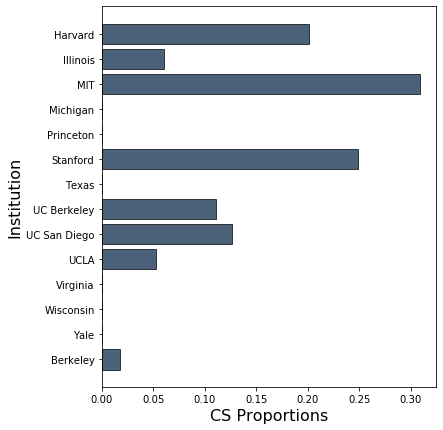

In [92]:
cs_proportion_by_school.barh('Institution')